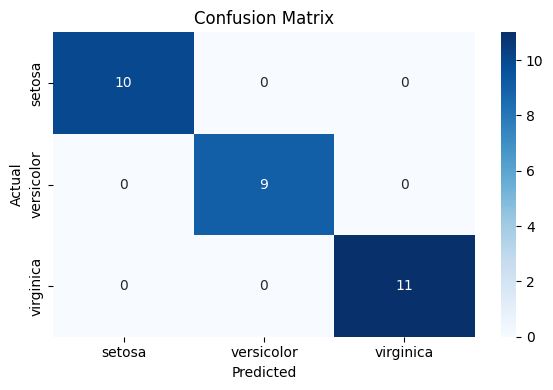

Accuracy: 1.0
Best_k: 1
conf mat: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Class report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
import pandas as pd

# Load the uploaded Iris dataset
file_path = 'iris (2).csv'
iris_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
iris_df.head()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different k values and find the best one
accuracy_scores = {}
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores[k] = accuracy_score(y_test, y_pred)

# Choose the best k
best_k = max(accuracy_scores, key=accuracy_scores.get)

# Train the model using the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_best)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Classification report
class_report = classification_report(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=best_knn.classes_,
            yticklabels=best_knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("Accuracy:",accuracy)
print("Best_k:", best_k)
print("conf mat:", conf_matrix)
print("Class report:", class_report)


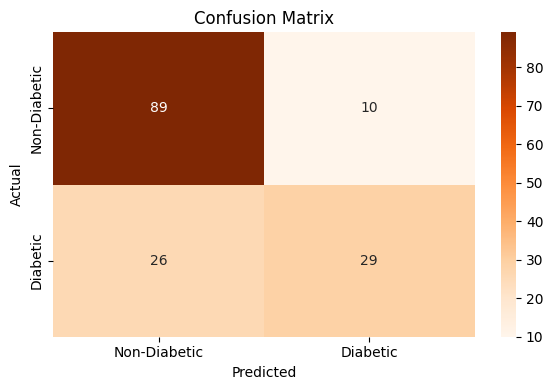

accuracy: 0.7662337662337663
best_k: 18
Conf mat: [[89 10]
 [26 29]]


In [2]:
# Load the diabetes dataset
diabetes_path = 'diabetes.csv'
diabetes_df = pd.read_csv(diabetes_path)

# Display the first few rows
diabetes_df.head()
from sklearn.preprocessing import StandardScaler

# Features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Finding best k
accuracy_scores = {}
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores[k] = accuracy_score(y_test, y_pred)

# Best k
best_k = max(accuracy_scores, key=accuracy_scores.get)

# Final model with best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_final)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='d',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("accuracy:",accuracy)
print("best_k:", best_k)
print("Conf mat:", conf_matrix)


Best k: 6
Accuracy: 0.9344262295081968


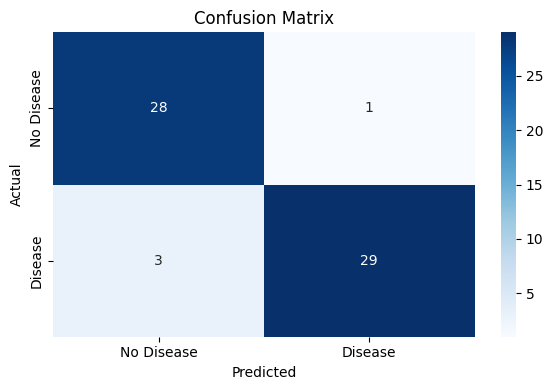

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [3]:
# Load the heart dataset
heart_path = 'heart.csv'
heart_df = pd.read_csv(heart_path)

# Display the first few rows
heart_df.head()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("heart.csv")  # Make sure the file path is correct

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find best k
best_k = 1
best_score = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

# Train final model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

# Accuracy
print("Best k:", best_k)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
